# Live births and deaths Germany (time series)

https://www.destatis.de/EN/Themes/Society-Environment/Population/Births/Tables/lrbev04.html

# Import Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
import requests
from bs4 import BeautifulSoup

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 10
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
url = 'https://www.destatis.de/EN/Themes/Society-Environment/Population/Births/Tables/lrbev04.html'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html;charset=utf-8 -- Encoding: utf-8


# Parse HTML Document

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [5]:
thead = soup.find_all('th', rowspan='1', scope='row')
tbody = soup.find('tbody')
trs = tbody.find_all('tr')


index = []
year = []

for idx, th in enumerate(thead):
  index.append(idx) 
  year.append(th.string)


livebirthstot = []
livebirthsper1000 = []
totdeaths = []
deathsper1000 = []
excesslivebirthdeaths = []

for td in trs:
  livebirthstot.append(td.findAll('td')[0].string)
  livebirthsper1000.append(td.findAll('td')[1].string)
  totdeaths.append(td.findAll('td')[2].string)
  deathsper1000.append(td.findAll('td')[3].string)
  excesslivebirthdeaths.append(td.findAll('td')[4].string) 

# Create Dataframe

In [6]:
data = {
    'Index': index,
    'Year': year
}

df = pd.DataFrame(data=data)
df1 = df[:72]                                                                       # create dataframe from first 72 indexes
df1

,Index,Year
0,0,2021
1,1,2020
2,2,2019
3,3,2018
4,4,2017
...,...,...
67,67,1954
68,68,1953
69,69,1952
70,70,1951


In [7]:
data1 = {
    'TotalLiveBirths': livebirthstot,
    'LiveBirthsper1000Residents': livebirthsper1000,
    'TotalDeaths': totdeaths,
    'Deathsper1000Residents': deathsper1000,
    'ExcessofLiveBirthsDeaths': excesslivebirthdeaths
}

df2 = pd.DataFrame(data=data1)
df2

,TotalLiveBirths,LiveBirthsper1000Residents,TotalDeaths,Deathsper1000Residents,ExcessofLiveBirthsDeaths
0,"795,517",-,"1,023,723",-,"-228,206"
1,"773,144",9.3,"985,572",11.8,"-212,428"
2,"778,090",9.4,"939,520",11.3,"-161,430"
3,"787,523",9.5,"954,874",11.5,"-167,351"
4,"784,901",9.5,"932,272",11.3,"-147,371"
...,...,...,...,...,...
67,"1,109,743",15.9,"775,291",11.1,"334,452"
68,"1,095,029",15.7,"790,654",11.4,"304,375"
69,"1,105,084",15.9,"767,639",11.1,"337,445"
70,"1,106,380",16.1,"752,697",10.9,"353,683"


# Merge Dataframes

In [8]:
df3 = pd.concat([df1, df2], axis=1)                                             # concat dataframes 1 & 2
df4 = df3.drop('Index', axis=1)                                                 # drop index column

# Head and Tail

In [9]:
df4

,Year,TotalLiveBirths,LiveBirthsper1000Residents,TotalDeaths,Deathsper1000Residents,ExcessofLiveBirthsDeaths
0,2021,"795,517",-,"1,023,723",-,"-228,206"
1,2020,"773,144",9.3,"985,572",11.8,"-212,428"
2,2019,"778,090",9.4,"939,520",11.3,"-161,430"
3,2018,"787,523",9.5,"954,874",11.5,"-167,351"
4,2017,"784,901",9.5,"932,272",11.3,"-147,371"
...,...,...,...,...,...,...
67,1954,"1,109,743",15.9,"775,291",11.1,"334,452"
68,1953,"1,095,029",15.7,"790,654",11.4,"304,375"
69,1952,"1,105,084",15.9,"767,639",11.1,"337,445"
70,1951,"1,106,380",16.1,"752,697",10.9,"353,683"


In [10]:
df5 = df4.applymap(lambda x: str.strip(x).replace(',', '').replace('-', ''))          # strip whitespaces, replace commas and hyphens
df5.head()

,Year,TotalLiveBirths,LiveBirthsper1000Residents,TotalDeaths,Deathsper1000Residents,ExcessofLiveBirthsDeaths
0,2021,795517,,1023723,,228206
1,2020,773144,9.3,985572,11.8,212428
2,2019,778090,9.4,939520,11.3,161430
3,2018,787523,9.5,954874,11.5,167351
4,2017,784901,9.5,932272,11.3,147371


In [11]:
cols2float = ['LiveBirthsper1000Residents', 'Deathsper1000Residents']                   

df5[cols2float] = df5[cols2float].replace('', np.nan)                                  # replace float missing values to NaN
df5[cols2float] = df5[cols2float].applymap(lambda x: np.float64(x))                    # convert data type to float
df5.head()

,Year,TotalLiveBirths,LiveBirthsper1000Residents,TotalDeaths,Deathsper1000Residents,ExcessofLiveBirthsDeaths
0,2021,795517,NaN,1023723,NaN,228206
1,2020,773144,9.3,985572,11.8,212428
2,2019,778090,9.4,939520,11.3,161430
3,2018,787523,9.5,954874,11.5,167351
4,2017,784901,9.5,932272,11.3,147371


In [12]:
df5.dtypes

Year                           object
TotalLiveBirths                object
LiveBirthsper1000Residents    float64
TotalDeaths                    object
Deathsper1000Residents        float64
ExcessofLiveBirthsDeaths       object
dtype: object

In [13]:
cols2num = ['Year', 'TotalLiveBirths', 'TotalDeaths', 'ExcessofLiveBirthsDeaths']

df5[cols2num] = df5[cols2num].applymap(lambda x: pd.to_numeric(x, errors='raise'))                 
df5.dtypes

Year                            int64
TotalLiveBirths                 int64
LiveBirthsper1000Residents    float64
TotalDeaths                     int64
Deathsper1000Residents        float64
ExcessofLiveBirthsDeaths        int64
dtype: object

In [14]:
df5.dtypes.value_counts()

int64      4
float64    2
dtype: int64

In [15]:
df5.drop('Year', axis=1).describe()

,TotalLiveBirths,LiveBirthsper1000Residents,TotalDeaths,Deathsper1000Residents,ExcessofLiveBirthsDeaths
count,7.200000e+01,71.000000,7.200000e+01,71.000000,72.000000
mean,9.069720e+05,11.757746,8.901554e+05,11.369014,187621.236111
std,2.089396e+05,3.289188,6.178826e+04,0.754149,124952.271853
min,6.626850e+05,8.100000,7.483290e+05,9.900000,7634.000000
25%,7.704588e+05,9.400000,8.458572e+05,10.800000,93633.500000
50%,8.130475e+05,10.400000,8.944475e+05,11.500000,148137.000000
75%,1.105408e+06,15.750000,9.398980e+05,12.000000,254929.000000
max,1.357304e+06,18.200000,1.023723e+06,12.800000,486985.000000


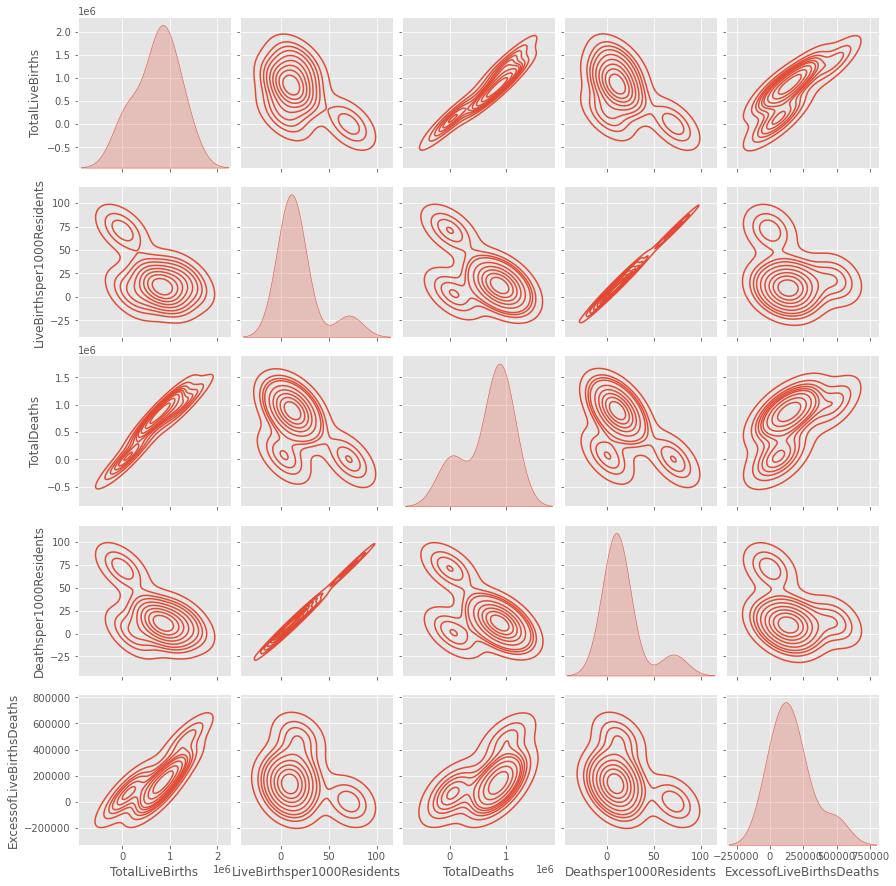

In [16]:
sns.pairplot(df5.drop('Year', axis=1).describe(), kind='kde')

In [17]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def million(x, pos):
  return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)

# Data Visualization

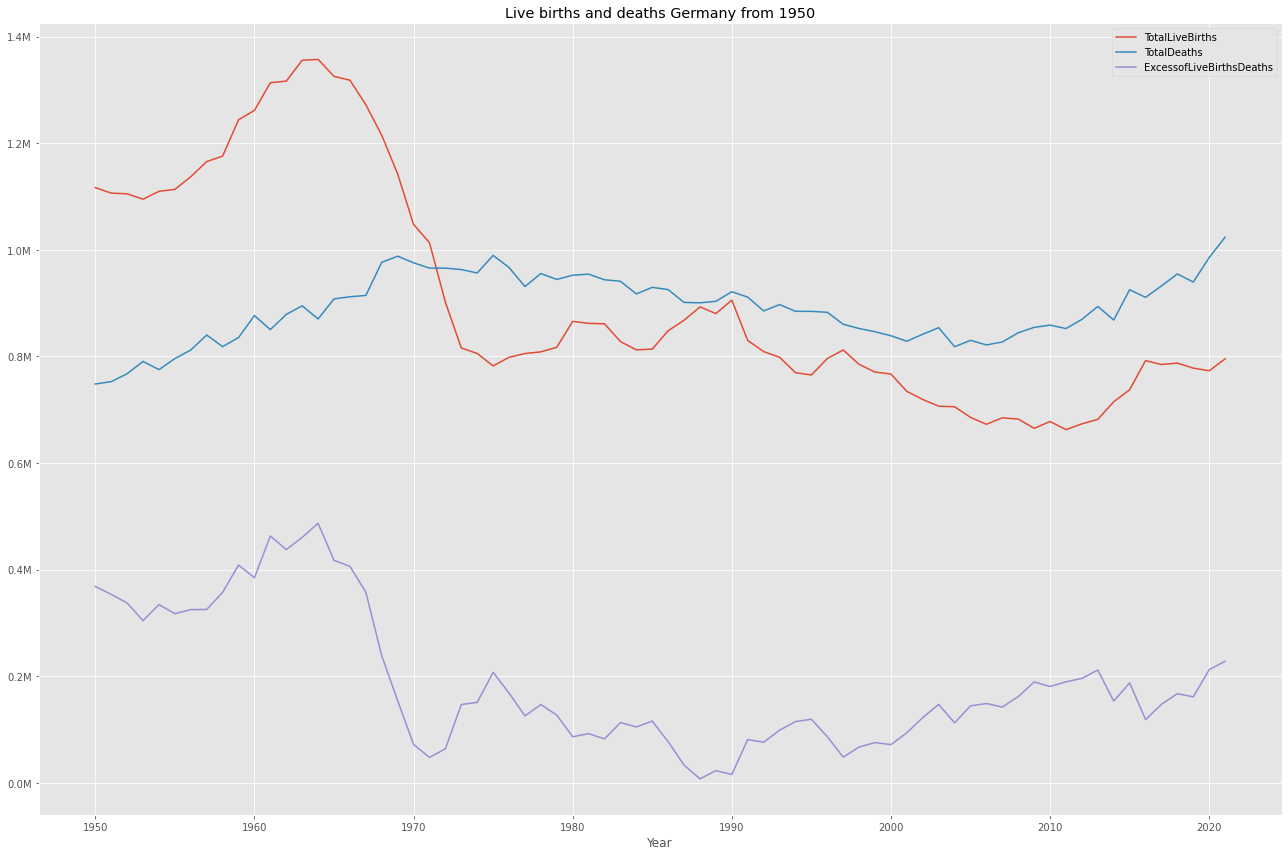

In [18]:
ax1 = df5.set_index('Year').drop(columns=['LiveBirthsper1000Residents', 'Deathsper1000Residents']).sort_index(ascending=True).plot(figsize=(18, 12))
ax1.set(title='Live births and deaths Germany from 1950')
ax1.yaxis.set_major_formatter(formatter=format_mill)

[Text(0.5, 1.0, 'Live births and deaths Germany from 1950')]

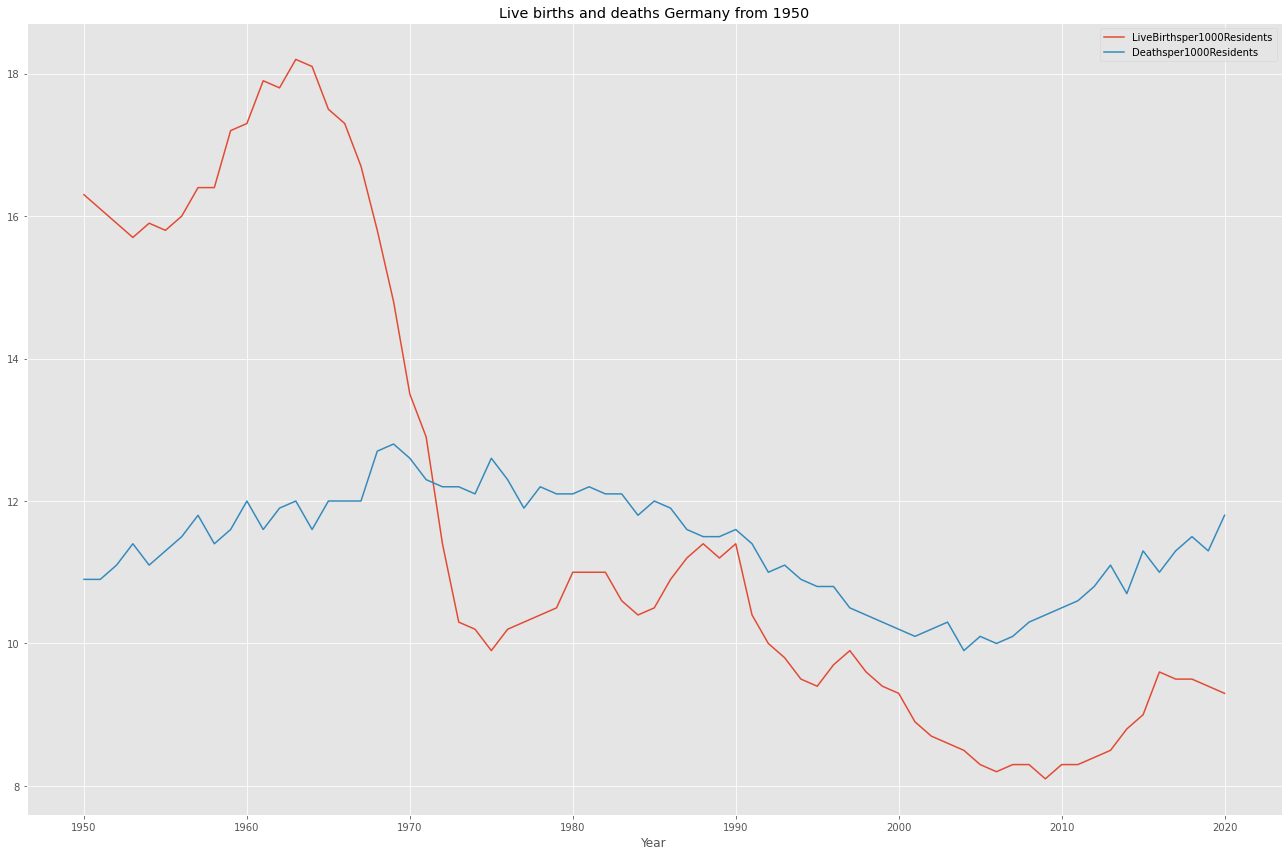

In [19]:
ax2 = df5.set_index('Year')\
         .drop(columns=['TotalLiveBirths', 'TotalDeaths', 'ExcessofLiveBirthsDeaths'])\
         .sort_index(ascending=True).plot(figsize=(18, 12))
ax2.set(title='Live births and deaths Germany from 1950')